# Importing required libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
from tensorflow import keras
import scipy
from keras.optimizers import Adam, SGD
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PREDATOR08\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PREDATOR08\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Cleaning and Analysis
## The dataset link is http://www.cs.cmu.edu/~ark/personas/

In [3]:
data=pd.read_csv("MovieSummaries/movie.metadata.tsv", sep = '\t', header = None)
data

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [4]:
data.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]
plots = []

with open("MovieSummaries/plot_summaries.txt", 'r',encoding="utf8") as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            plots.append(row)

42303it [00:01, 22087.57it/s]


In [5]:
movie_id = []
plot = []

for i in tqdm(plots):
  movie_id.append(i[0])
  plot.append(i[1])

movies = pd.DataFrame({'movie_id': movie_id, 'synopsis': plot})

100%|███████████████████████████████████████████████████████████████████████| 42303/42303 [00:00<00:00, 1764839.23it/s]


In [6]:
movies.head()

,movie_id,synopsis
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [7]:
data['movie_id'] = data['movie_id'].astype(str)

movies = pd.merge(movies, data[['movie_id', 'movie_name', 'genre']], on = 'movie_id')

movies.head()

,movie_id,synopsis,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [8]:
genres = [] 

for i in movies['genre']: 
  genres.append(list(json.loads(i).values())) 

movies['genre_new'] = genres

In [9]:
data = movies[~(movies['genre_new'].str.len() == 0)]
data.shape, movies.shape

((41793, 5), (42204, 5))

In [10]:
data.head()

,movie_id,synopsis,movie_name,genre,genre_new
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]"
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]"
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]"
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema..."


In [11]:
genres_list = sum(genres,[])
print("No of Genres: ",len(set(genres_list)))

No of Genres:  363


In [12]:
genres_list = nltk.FreqDist(genres_list) 

genres_list = pd.DataFrame({'Genre': list(genres_list.keys()),'Count': list(genres_list.values())})

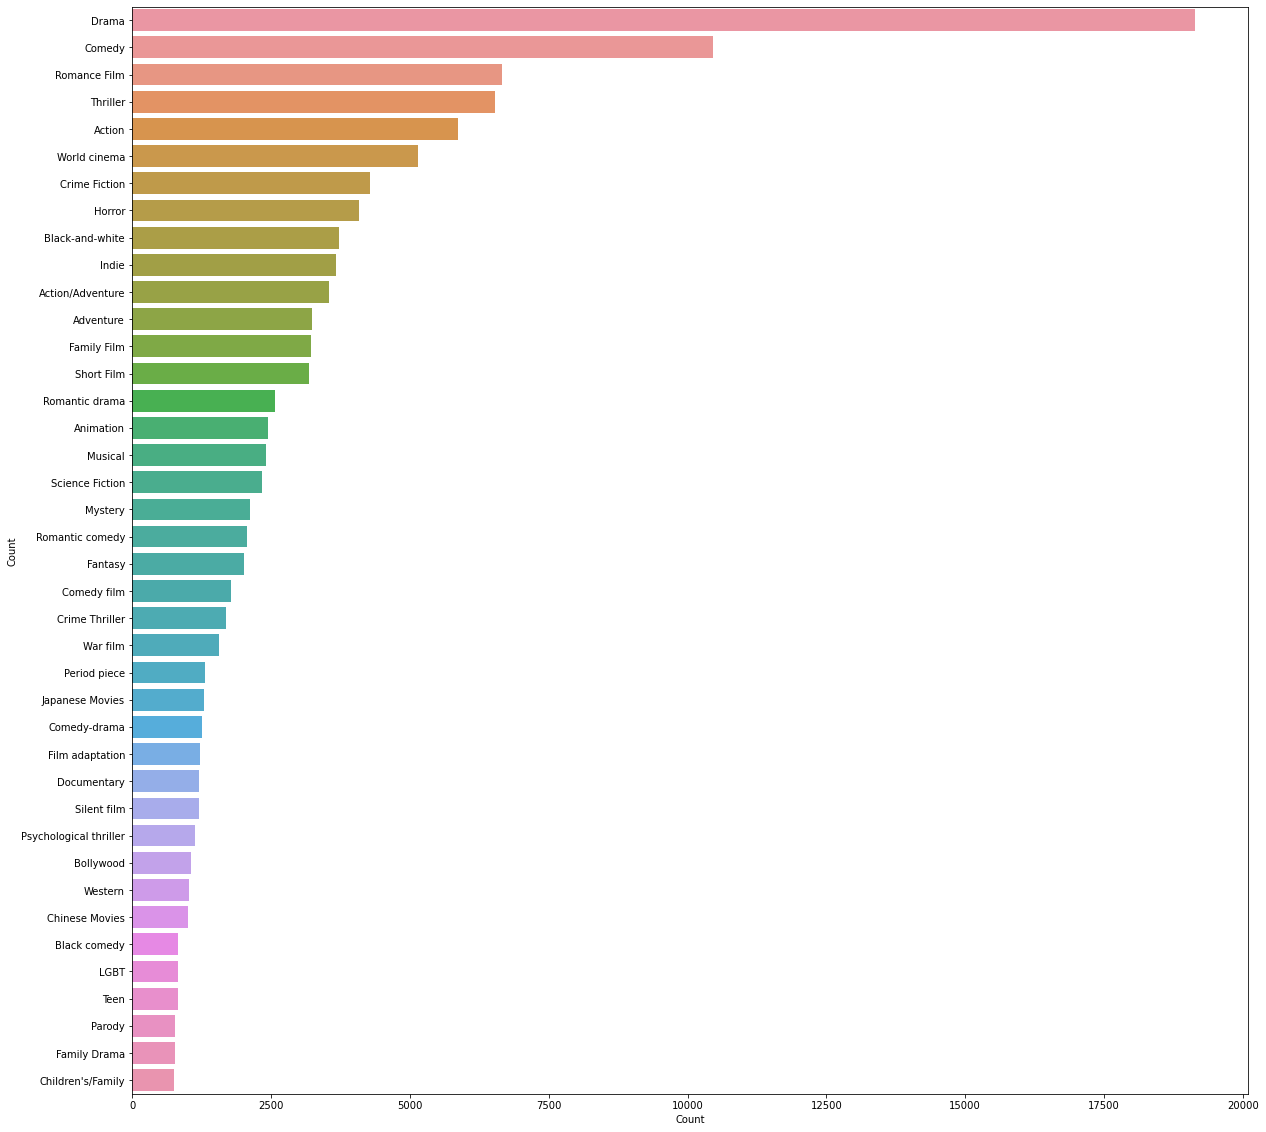

In [13]:
g = genres_list.nlargest(columns="Count",n=40) 
plt.figure(figsize=(20,20)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [14]:
def filter_synopsis(synopsis):
    synopsis = re.sub("\'", "", synopsis) 
    synopsis = re.sub("[^a-zA-Z]"," ",synopsis) 
    synopsis = ' '.join(synopsis.split())
    synopsis = synopsis.lower() 
    
    return synopsis

In [15]:
data['filtered_plot'] = data['synopsis'].apply(lambda x:filter_synopsis(x))
data

,movie_id,synopsis,movie_name,genre,genre_new,filtered_plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov a hard working taxi driver and lyosha ...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",the nation of panem consists of a wealthy capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan is sentenced for six year...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]",the lemon drop kid a new york city swindler is...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema...",seventh day adventist church pastor michael ch...
...,...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's],the story is about reema a young muslim school...
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Silent film, Indie, Black-and-white, Period p...",in hollywood director leo andreyev looks throu...
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Music, Biographical film, Documen...",american luthier focuses on randy parsons tran...
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan a middle aged dry fruit sell...


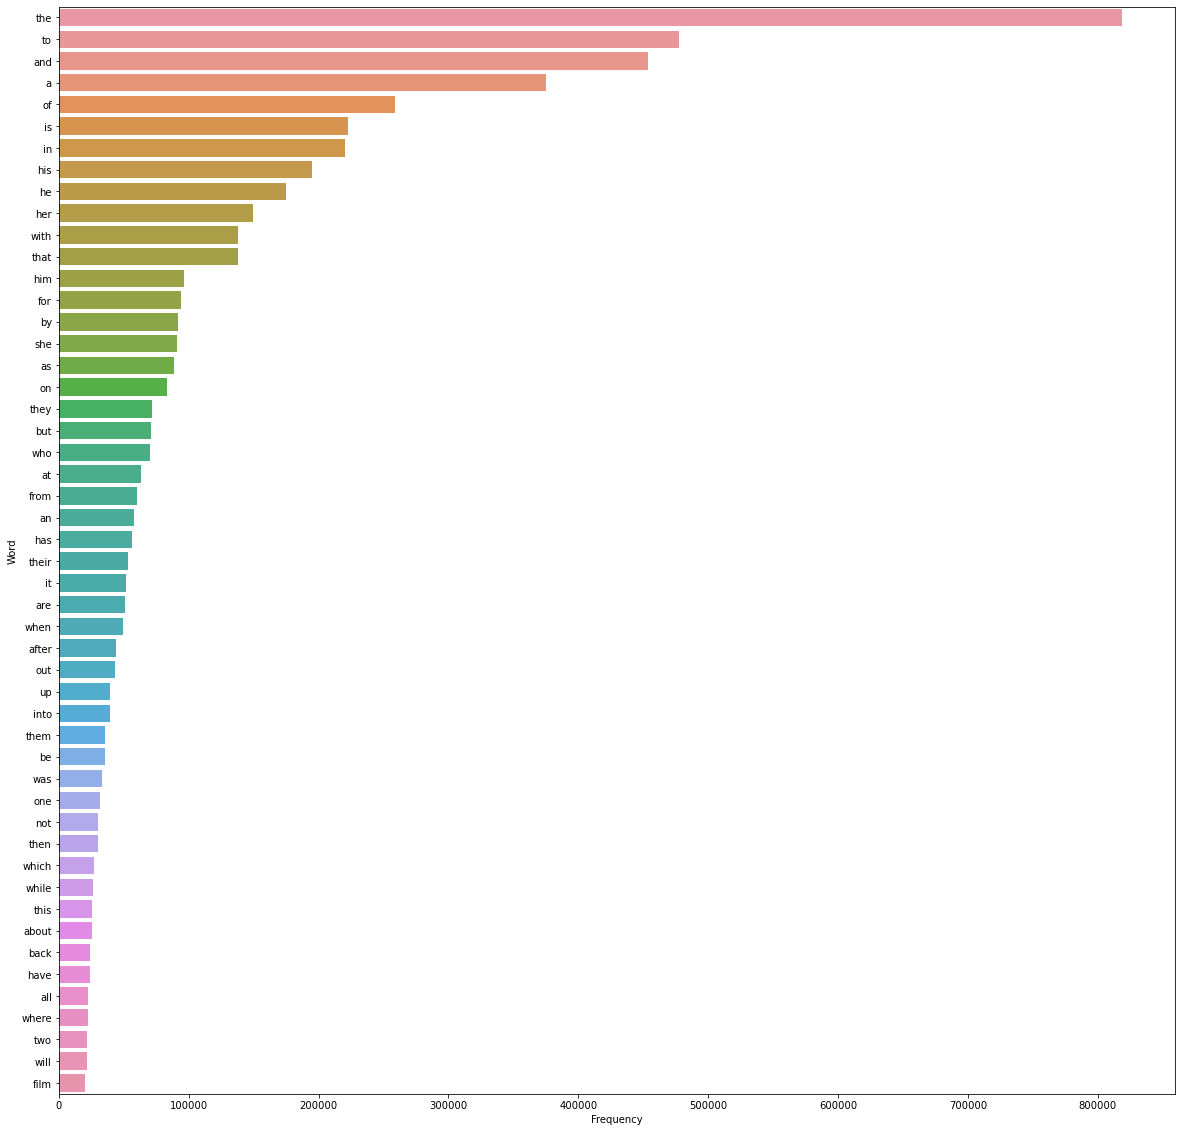

In [17]:
def word_frequencies(col, items): 
  text = ' '.join([plot for plot in col]) 
  text = text.split() 
  freq_dist = nltk.FreqDist(text) 
  words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'Frequency':list(freq_dist.values())}) 
  
  order = words_df.nlargest(columns="Frequency", n = items) 
  
  plt.figure(figsize=(20,20)) 
  ax = sns.barplot(data=order, x= "Frequency", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
word_frequencies(data['filtered_plot'], 50)

In [18]:
eng_stopwords = set(stopwords.words('english'))

def stopwords_filtering(plot):
    filtered_text = [x for x in plot.split() if not x in eng_stopwords]
    return ' '.join(filtered_text)

data['filtered_plot'] = data['filtered_plot'].apply(lambda x: stopwords_filtering(x))
data

,movie_id,synopsis,movie_name,genre,genre_new,filtered_plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov hard working taxi driver lyosha saxoph...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",nation panem consists wealthy capitol twelve p...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan sentenced six years priso...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]",lemon drop kid new york city swindler illegall...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema...",seventh day adventist church pastor michael ch...
...,...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's],story reema young muslim schoolgirl malabar lo...
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Silent film, Indie, Black-and-white, Period p...",hollywood director leo andreyev looks photogra...
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Music, Biographical film, Documen...",american luthier focuses randy parsons transfo...
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan middle aged dry fruit seller...


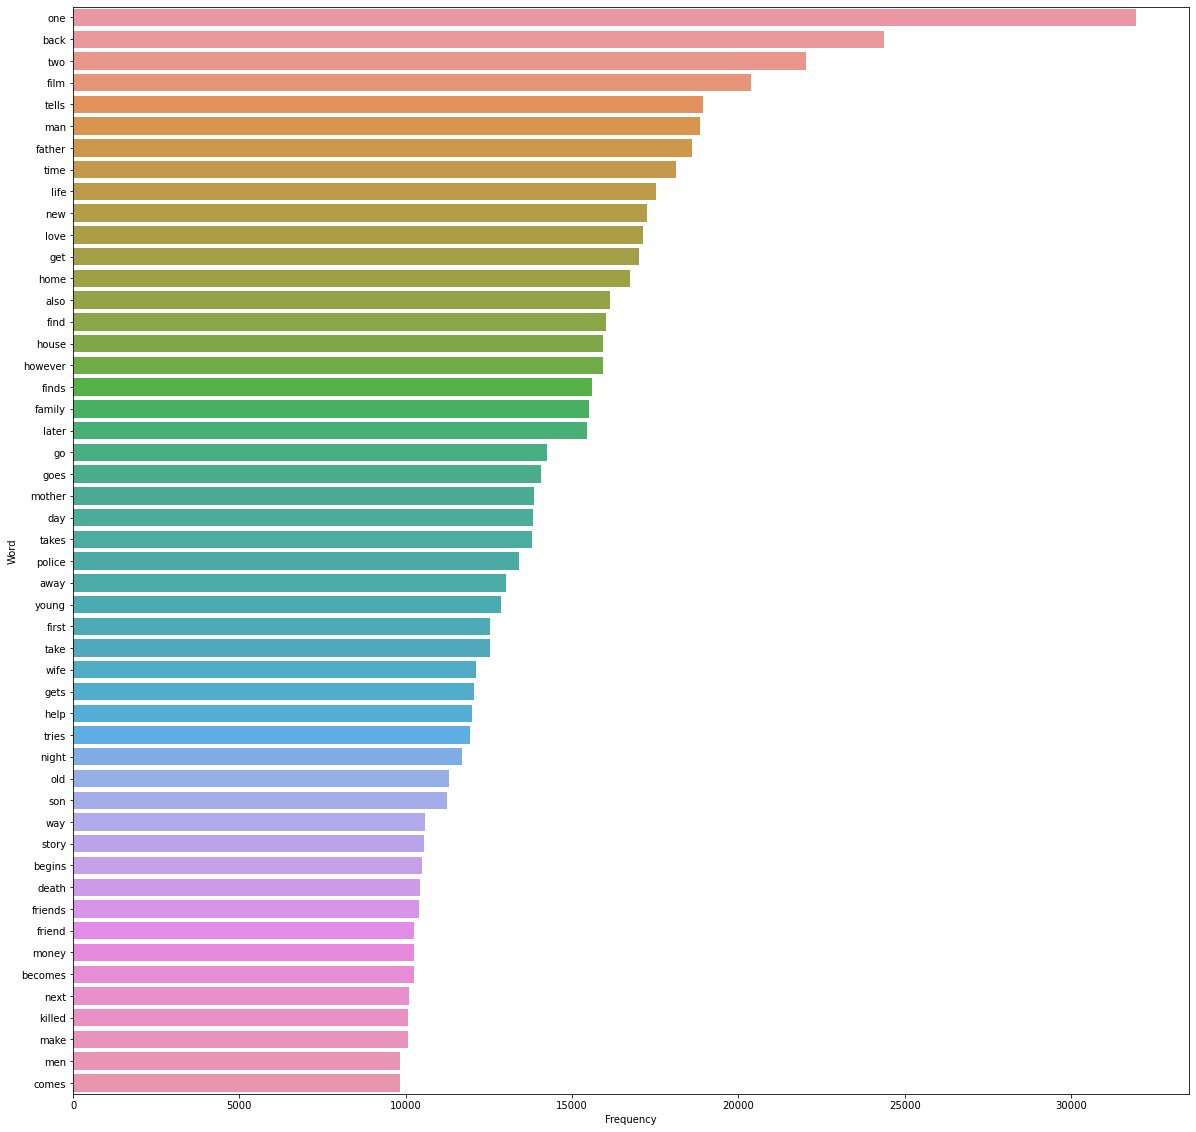

In [20]:
word_frequencies(data['filtered_plot'], 50)

In [21]:
def lemmatization_plot(plot):
    lemmatizer = WordNetLemmatizer()
    filtered_text = [lemmatizer.lemmatize(x) for x in plot.split()]
    return ' '.join(filtered_text)

data['filtered_plot'] = data['filtered_plot'].apply(lambda x: lemmatization_plot(x))
data

,movie_id,synopsis,movie_name,genre,genre_new,filtered_plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci...","[Drama, World cinema]",shlykov hard working taxi driver lyosha saxoph...
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":...","[Action/Adventure, Science Fiction, Action, Dr...",nation panem consists wealthy capitol twelve p...
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""...","[Musical, Action, Drama, Bollywood]",poovalli induchoodan sentenced six year prison...
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""...","[Screwball comedy, Comedy]",lemon drop kid new york city swindler illegall...
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...","[Crime Fiction, Drama, Docudrama, World cinema...",seventh day adventist church pastor michael ch...
...,...,...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}",[Children's],story reema young muslim schoolgirl malabar lo...
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...","[Silent film, Indie, Black-and-white, Period p...",hollywood director leo andreyev look photograp...
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music...","[Short Film, Music, Biographical film, Documen...",american luthier focus randy parson transforma...
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}",[Drama],abdur rehman khan middle aged dry fruit seller...


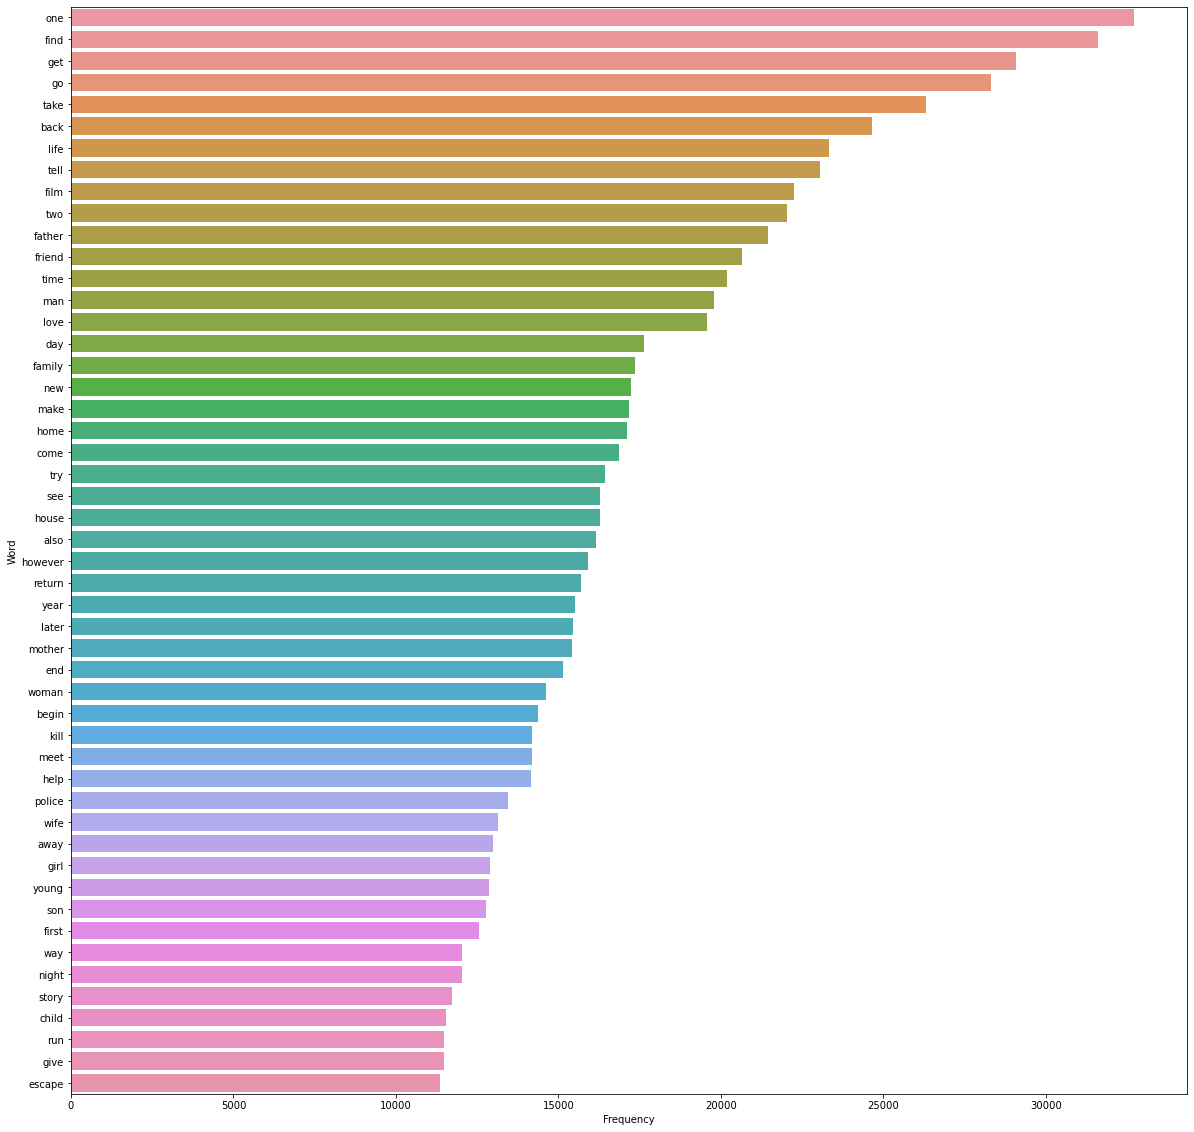

In [22]:
word_frequencies(data['filtered_plot'], 50)

# Importing ML libraries

In [8]:
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import cross_validate

from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score

# Importing a saved dataset so that all the four models are given the same input

In [3]:
data1 = pd.read_csv("word2vec_movies.csv")
data1

,Unnamed: 0,Unnamed: 0.1,movie_id,synopsis,movie_name,genre,genre_new,filtered_plot,sum_w2v,avg_w2v
0,5205,5259,10726300,Thakur Bhupendra Singh and his son Ajit are ...,Aaj Ka Arjun,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/03q4nz"": ""Wo...","['Crime Fiction', 'World cinema', 'Musical', '...",thakur bhupendra singh son ajit landlord presi...,[ 2.556839 3.1699066 2.5140228 0.45...,[ 0.03551165 0.04402648 0.03491698 0.006299...
1,19614,19823,31585384,Writer Lauren Cochran suffers from agoraphobi...,The Nesting,"{""/m/03npn"": ""Horror""}",['Horror'],writer lauren cochran suffers agoraphobia bid ...,[ 1.83398438e+00 1.34423828e+00 -3.68164062e-...,[ 7.33593777e-02 5.37695326e-02 -1.47265624e-...
2,40534,40935,4062150,Okuyama's face was disfigured in an industrial...,Tanin no kao,"{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","['Science Fiction', 'Japanese Movies', 'Surrea...",okuyamas face disfigured industrial accident f...,[ 15.684422 9.671326 4.4506836 11.86...,[ 0.07842211 0.04835663 0.02225342 0.059335...
3,15345,15506,33569921,"As students Fritz , Ulrich and Johannes Wolf ...",Immer die Radfahrer,"{""/m/05p553"": ""Comedy film""}",['Comedy film'],student fritz ulrich johannes wolf albach rett...,[ 4.185997 0.38246155 -0.7231293 5.50...,[ 0.05507891 0.00503239 -0.00951486 0.072433...
4,30262,30564,18568161,"Halo revolves around a seven year old girl, Sa...",Halo,"{""/m/07s9rl0"": ""Drama""}",['Drama'],halo revolves around seven year old girl sasha...,[ 6.78332520e+00 2.71803284e+00 -7.62779236e-...,[ 7.98038244e-02 3.19768563e-02 -8.97387322e-...
...,...,...,...,...,...,...,...,...,...,...
4174,7355,7431,24465420,British Captain Fred Allison bids farewell to...,Captured!,"{""/m/082gq"": ""War film""}",['War film'],british captain fred allison bid farewell new ...,[ 6.591466 12.522953 3.6369324 7.44...,[ 0.03009802 0.05718243 0.016607 0.034015...
4175,7105,7178,9701325,The President of the United States nominates ...,Advise and Consent,"{""/m/0hn10"": ""LGBT"", ""/m/07s9rl0"": ""Drama"", ""/...","['LGBT', 'Drama', 'Political drama', 'Courtroo...",president united state nominates robert leffin...,[ 3.06790924e+00 5.40142250e+00 7.32398033e+...,[ 7.86643382e-03 1.38498014e-02 1.87794361e-...
4176,31613,31927,4848029,Jim Doyle is a maverick mathematician who has...,The Bank,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/02wtdps"": ""C...","['Crime Fiction', 'Crime Thriller', 'Drama', '...",jim doyle maverick mathematician devised formu...,[ 2.1972656e-01 4.2459106e-01 -5.4833221e-01 ...,[ 1.15645556e-02 2.23468989e-02 -2.88595911e-...
4177,15157,15312,2565462,"In student lodgings in Munich, Sophie Scholl a...",Sophie Scholl – The Final Days,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/03q4nz"": ""Wo...","['Crime Fiction', 'World cinema', 'History', '...",student lodging munich sophie scholl close fri...,[ 16.906288 16.096968 24.503977 21.56...,[ 0.02981709 0.02838971 0.04321689 0.038034...


In [4]:
genres = [] 

for i in data1['genre']: 
  genres.append(list(json.loads(i).values()))

data1['genre_list'] = genres

genres_list = sum(genres,[])
print("No of Genres: ",len(set(genres_list)))

No of Genres:  282


In [5]:
multilabel_binarizer1 = MultiLabelBinarizer()
multilabel_binarizer1.fit(data1['genre_list'])
y1 = multilabel_binarizer1.transform(data1['genre_list'])
y1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
vectorizer1 = TfidfVectorizer()
x1 = vectorizer1.fit_transform(data1['filtered_plot'])
print(x1.shape,y1.shape)

(4179, 41619) (4179, 282)


# Initiating the Model and using cross-validation

In [9]:
lr1 = LogisticRegression()
clf1 = OneVsRestClassifier(lr1)

In [10]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'micro'),
           'recall': make_scorer(recall_score, average = 'micro'),
           'f1': make_scorer(f1_score, average = 'micro'),
           'log_loss': make_scorer(log_loss)}

In [11]:
scores = cross_validate(clf1, x1, y1, cv=5,scoring=scoring,return_train_score=True)
scores

{'fit_time': array([72.84498978, 70.21664453, 73.03024626, 71.51209688, 68.00025082]),
 'score_time': array([0.26206899, 0.28903341, 0.31716394, 0.27405834, 0.26499414]),
 'test_accuracy': array([0.03229665, 0.0430622 , 0.034689  , 0.03947368, 0.02994012]),
 'train_accuracy': array([0.0625187 , 0.06042477, 0.06401436, 0.05862997, 0.06010766]),
 'test_precision': array([0.66006601, 0.66049383, 0.70588235, 0.74545455, 0.70065789]),
 'train_precision': array([0.95605701, 0.96016898, 0.96079614, 0.96017424, 0.96424168]),
 'test_recall': array([0.06489293, 0.0739461 , 0.06561595, 0.06610771, 0.0703667 ]),
 'train_recall': array([0.13271783, 0.12915009, 0.13160939, 0.12739432, 0.128344  ]),
 'test_f1': array([0.11816839, 0.13300186, 0.12007063, 0.1214455 , 0.12788952]),
 'train_f1': array([0.23307999, 0.22767602, 0.23150705, 0.22494351, 0.22653534]),
 'test_log_loss': array([50.32575981, 45.23212611, 49.12483205, 46.1379045 , 47.15738051]),
 'train_log_loss': array([59.67928034, 60.99124069,

In [12]:
print("The Fit Time is: ",scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",scores['test_log_loss'].mean())
print("\n")

The Fit Time is:  71.12084565162658


The Score Time is:  0.2814637660980225


The Train Accuracy score is:  0.06113909017915033


The Train F1 score is:  0.22874838015550467


The Train Precision score is:  0.9602876083580141


The Train Recall score is:  0.1298431260053659


The Train Log Loss is:  59.402530370316


The Test Accuracy score is:  0.0358923301721915


The Test F1 score is:  0.12411518090924578


The Test Precision score is:  0.6945109253787436


The Test Recall score is:  0.06818587652349684


The Test Log Loss is:  47.595600597433524


